# Trabalho de Redes Neurais em Python

**Aluno:** Augusto Lemonie Gilioli (2023178440013)

**Sobre:** Esta Inteligência Artificial (IA) foi projetada para classificar imagens entre duas categorias: cães e gatos. Utilizando uma Rede Neural Convolucional (CNN), um dos tipos de arquitetura de redes neurais mais eficazes para processamento de imagens, a IA é capaz de aprender características específicas das imagens e, com isso, realizar previsões sobre novas imagens fornecidas.

# Importando as bibliotecas:

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Pré-processamento de dados:

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Montar o Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Definir os diretórios de treino e teste
#train_dir = 'archive/dataset/training_set'
#test_dir = 'archive/dataset/test_set'
train_dir = 'archive/dog vs cat/dataset/training_set'
test_dir = 'archive/dog vs cat/dataset/test_set'

# Inicializar o ImageDataGenerator para pré-processamento e aumento de dados
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalizar os valores dos pixels
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizar os valores dos pixels

# Carregar os dados de treino e teste
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Redimensione conforme o que o seu modelo espera
    batch_size=32,  # Tamanho do batch
    class_mode='binary'  # Classificação binária (cães e gatos)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste:

Não precisa usar o train_test_split aqui. O ImageDataGenerator vai separar o conjunto de dados automaticamente com base na organização das pastas. Keras vai cuidar do resto.

In [5]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =0)

# Dimensionamento de recursos:

In [16]:
# Gerador de dados para treino com normalização (rescale)
train_datagen = ImageDataGenerator(rescale=1./255)

# Gerador de dados para teste com normalização (rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Construindo o modelo CNN
**Explicação:**
Camadas de Convolução (Conv2D): Essas camadas detectam padrões nas imagens, como bordas, formas e texturas. A primeira camada tem 32 filtros e tamanho de kernel 3x3, que percorrem a imagem extraindo esses padrões.

**Pooling (MaxPooling2D):** Após cada camada de convolução, usamos pooling para reduzir a dimensionalidade e preservar as características importantes, o que também ajuda a evitar overfitting.
Camada Flatten: Essa camada achata as saídas das camadas convolucionais em uma única dimensão para que possamos conectar essas saídas às camadas densas (fully connected).

**Camada de saída:** Como você está fazendo classificação binária (cães vs. gatos), a última camada tem uma única unidade com ativação sigmoid.

In [17]:
from tensorflow.keras import layers, models

# Inicializar o modelo CNN
cnn = models.Sequential()

# Definir a camada de entrada explicitamente
cnn.add(layers.Input(shape=(64, 64, 3)))

# Primeira camada de Convolução e Pooling
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Não precisa mais de input_shape
cnn.add(layers.MaxPooling2D((2, 2)))

# Segunda camada de Convolução e Pooling
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Terceira camada de Convolução e Pooling
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Flatten para achatar as saídas e conectar à Rede Neural Densa
cnn.add(layers.Flatten())

# Camadas densas (conexão completa)
cnn.add(layers.Dense(128, activation='relu'))

# Camada de saída com ativação sigmoide (para classificação binária)
cnn.add(layers.Dense(1, activation='sigmoid'))


**Treinamento da CNN**

*A próxima etapa é treinar o modelo criado em nosso conjunto de treinamento. O treinamento da RNA requer duas etapas.*

(Compilando a CNN)

In [18]:
#ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [19]:
cnn.fit(
    train_generator,
    steps_per_epoch=300,
    epochs=10,
    validation_data=test_generator,
    validation_steps=50 
)



Epoch 1/10


c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/300 ━━━━━━━━━━━━━━━━━━━━ 29s 594ms/step - accuracy: 0.5281 - loss: 0.6916

c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


300/300 ━━━━━━━━━━━━━━━━━━━━ 183s 592ms/step - accuracy: 0.5357 - loss: 0.6873 - val_accuracy: 0.6650 - val_loss: 0.6136
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 51s 167ms/step - accuracy: 0.6764 - loss: 0.6051 - val_accuracy: 0.7100 - val_loss: 0.5731
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - accuracy: 0.7176 - loss: 0.5610 - val_accuracy: 0.7500 - val_loss: 0.5163
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.7364 - loss: 0.5269 - val_accuracy: 0.7150 - val_loss: 0.5126
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 160ms/step - accuracy: 0.7669 - loss: 0.4974 - val_accuracy: 0.7738 - val_loss: 0.4772
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 0.7794 - loss: 0.4676 - val_accuracy: 0.7900 - val_loss: 0.4558
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 178ms/step - accuracy: 0.7941 - loss: 0.4354 - val_accuracy: 0.7819 - val_loss: 0.4408
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.7998 - loss: 0.4359 - val

**Fazendo as previsões e avaliando o modelo:**

**cnn.predict(test_generator):** Usa o gerador de teste para fazer previsões. Como o test_generator carrega os dados em lotes, o método predict processa todas as imagens de teste.

**y_pred = (y_pred > 0.5):** Converte as previsões em rótulos binários (0 ou 1) com base no limiar de 0.5. Isso é necessário porque a última camada da CNN tem uma função de ativação sigmoid, o que resulta em valores entre 0 e 1.

**test_generator.classes:** O test_generator contém as classes verdadeiras, e você pode acessá-las com a propriedade .classes, que retorna os rótulos reais de cada imagem no conjunto de teste.
Matriz de confusão e acurácia: A confusion_matrix e accuracy_score são usadas para avaliar o desempenho do modelo.

In [10]:
# Fazendo previsões com o modelo CNN
y_pred = cnn.predict(test_generator)  # Usa o test_generator em vez de X_test
y_pred = (y_pred > 0.5)  # Converte para classe 0 ou 1 (binário)
y_pred = y_pred.astype(int)

# Pegando as classes reais do conjunto de teste
y_test = test_generator.classes  # As classes verdadeiras do test_generator

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


In [11]:
# Fazendo a matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[475 525]
 [457 543]]


**Calcule a pontuação de precisão:**

In [12]:
#accuracy_score(y_test, y_pred)
# Exibindo a acurácia
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.509


## Teste:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


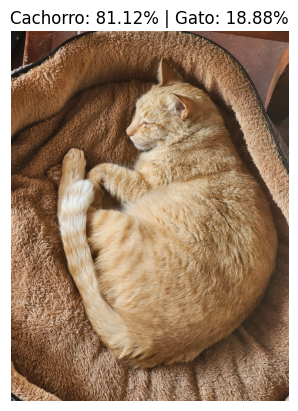

É um cachorro!


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model):
    # Carregar a imagem e redimensionar para o tamanho que o modelo espera (64x64)
    img = image.load_img(image_path, target_size=(64, 64))
    
    # Converter a imagem para um array numpy
    img_array = image.img_to_array(img)
    
    # Adicionar uma dimensão extra para simular um batch de tamanho 1
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalizar a imagem (rescale para valores entre 0 e 1)
    img_array /= 255.0
    
    # Fazer a predição
    prediction = model.predict(img_array)

    # Obter a probabilidade de ser um cachorro
    dog_prob = prediction[0][0]
    cat_prob = 1 - dog_prob  # Probabilidade complementar de ser um gato
    
    plt.imshow(image.load_img(image_path))  # Carrega e plota a imagem original
    plt.axis('off')  # Remove o eixo da imagem
    plt.title(f"Cachorro: {dog_prob * 100:.2f}% | Gato: {cat_prob * 100:.2f}%")
    plt.show()
    
    # Interpretação da predição
    if prediction[0][0] > 0.5:
        print("É um cachorro!")
    else:
        print("É um gato!")

# Passe o caminho da imagem de teste e o modelo treinado para fazer a predição
image_path = 'imagemChose/image.jpeg'  # Insira o caminho da sua imagem
predict_image(image_path, cnn)  # "cnn" é o nome do modelo que você treinou
